# <center> Assignment 3

In [ ]:
###### IMPORTANT ########
Your_Name = " "
Your_Email_id = " "

In [ ]:
# import libraries 
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 
import matplotlib.pyplot as plt

## Q1 (3 points) 
#### Which of the following is not an activation function

* a - Sigmoid function
* b - Hyperbolic tangent function
* c - Rectified linear unit (RELU) function
* d - Leaky RELU function
* e - dynamic function
* f - Maxout function
* g - gaussian function
* h - sobel function
* i - Exponential Linear unit (ELU) function

In [ ]:
# print the correct options here
print("E H ")

# G is doubtful - CORRECT hai E G H!

E H 


## Q2(3 points)

#### Suppose a neuron N in layer 2 has 5 input neurons from layer 1. Do all these 5 input neurons have the same contribution towards the output of the neuron N? Explain.

In [ ]:
# write your answer here 
print("NO, all these 5 input layer have different contribution towards the output of the neuron N. As each input contains different weight will impact differently on our next layer.")

## Q3 (4 points)
#### Organise below points in right sequence

1. Dataset capturing 
2. Optimizing parameters with backpropagation
3. Predicting the final output using our model
4. Data preprocessing
5. Calculating loss function
6. Applying activation function on initial output
7. Initializing weights and biases

In [ ]:
# print the right sequence here
print("7 1 4 6 5 2 3")

## Q4 (6 points) 

#### Define below points - 

a. Why is normalization done in batches? 

b. When is it suitable to use batches? 

c. Can we do without batches? If yes, in which case?

In [ ]:
# write you answers here

a = 'To reduce irregularities in data set we normalize the entire data set. If the dataset is too large, we do the normalization in batches.'
b = 'When there is large dataset and we have preparing a deep neural network with many layers as they can be delicate to the underlying initial random weights and design of the learning algorithm. Sometimes it very expensive to load the data into the systems and wehave limited number of network, so we have to feed the data into batches and normalize the batch, for that we have to add additional layers to it (sometimes batch normalization layer, which perform standardizing and normalizing within the layer and make it ready for the next input).'
c = 'Yes, we can work wihtout batches - whenever the data set size is small. In that case, normalization will also happen without batches - once over the entire dataset.'
print(a)
print()
print(b)
print()
print(c)


To reduce irregularities in data set we normalize the entire data set. If the dataset is too large, we do the normalization in batches.

When there is large dataset and we have preparing a deep neural network with many layers as they can be delicate to the underlying initial random weights and design of the learning algorithm. Sometimes it very expensive to load the data into the systems and wehave limited number of network, so we have to feed the data into batches and normalize the batch, for that we have to add additional layers to it (sometimes batch normalization layer, which perform standardizing and normalizing within the layer and make it ready for the next input).

Yes, we can work wihtout batches - whenever the data set size is small. In that case, normalization will also happen without batches - once over the entire dataset.


## Q5  (4 points)

#### Which propogation pass helps you (forward, backward)

a. obtain network output?

b. update weights?

c. calculate gradients?

d. calculate loss?

In [ ]:
# print your answers below

print('foward propagation')

print('backward propagation')

print('backward propagation')

print('forward propagation')

## Q6. (4 points)
### Write categorical crossentropy loss in python from scratch and state a difference between categorial crossentropy and binary crossentropy.

In [ ]:
## write your answers here

def categorical_crossentropy(target, output, from_logits=False):
    if from_logits:
        output = softmax(output)
    else:
        output /= output.sum(axis=-1, keepdims=True)
    output = np.clip(output, 1e-7, 1 - 1e-7)
    return np.sum(target * -np.log(output), axis=-1, keepdims=False)



print("Binary cross-entropy is for binary classification and categorical cross-entropy is for multi-class classification, but both work for binary classification, for categorical cross-entropy you need to change data to categorical(one-hot encoding). Binary cross entropy is just a special case of categorical cross entropy.")

# Building a pokemon classification model using tensorflow

## Import dataset

#### Go to Add data button and import https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Q.7 (5 points)
#### List all the image filenames present in "../input/pokemon-images-and-types/images/images" location and show first five images using matplotib subplots


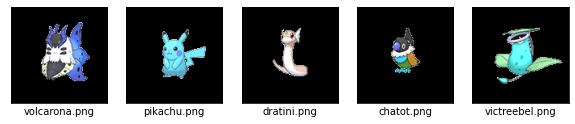

In [ ]:
# defining root directory
root_dir = r'/content/drive/MyDrive/Kaggle_DBs/archive/images/images'

files = os.listdir(root_dir)

plt.figure(figsize=(10,10))
for i in range(5):
  full_path = root_dir + '/' + files[i]
  img = cv2.imread(full_path)
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xlabel(files[i])  
plt.show()




## Run the below 3 cells as it is

In [ ]:
## Run the below cells as it is
data = pd.read_csv(r'/content/drive/MyDrive/Kaggle_DBs/archive/pokemon.csv')

data.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


## We are going to use Type1 column as our labels. Each Name is unique and classified into 18 Type1 types. 

In [ ]:
## Run the below cells as it is
data_dict = {}

for key, val in zip(data["Name"], data["Type1"]):
    data_dict[key] = val
print(data_dict)

{'bulbasaur': 'Grass', 'ivysaur': 'Grass', 'venusaur': 'Grass', 'charmander': 'Fire', 'charmeleon': 'Fire', 'charizard': 'Fire', 'squirtle': 'Water', 'wartortle': 'Water', 'blastoise': 'Water', 'caterpie': 'Bug', 'metapod': 'Bug', 'butterfree': 'Bug', 'weedle': 'Bug', 'kakuna': 'Bug', 'beedrill': 'Bug', 'pidgey': 'Normal', 'pidgeotto': 'Normal', 'pidgeot': 'Normal', 'rattata': 'Normal', 'raticate': 'Normal', 'spearow': 'Normal', 'fearow': 'Normal', 'ekans': 'Poison', 'arbok': 'Poison', 'pikachu': 'Electric', 'raichu': 'Electric', 'sandshrew': 'Ground', 'sandslash': 'Ground', 'nidoran-f': 'Poison', 'nidorina': 'Poison', 'nidoqueen': 'Poison', 'nidoran-m': 'Poison', 'nidorino': 'Poison', 'nidoking': 'Poison', 'clefairy': 'Fairy', 'clefable': 'Fairy', 'vulpix': 'Fire', 'ninetales': 'Fire', 'jigglypuff': 'Normal', 'wigglytuff': 'Normal', 'zubat': 'Poison', 'golbat': 'Poison', 'oddish': 'Grass', 'gloom': 'Grass', 'vileplume': 'Grass', 'paras': 'Bug', 'parasect': 'Bug', 'venonat': 'Bug', 've

In [ ]:
## Run the below cells as it is
labels = data["Type1"].unique()
print(labels)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


## Q8. (7 points)

#### Create a dictionary and assign each label in labels list a unique id from 1 to 18. Name the dictionary as "labels_idx"

In [ ]:
## write your code here

pokemon_ids = range(18)

labels_idx = dict(zip(labels, pokemon_ids))

print(labels_idx)

## Q.9 (4 points)
#### Understand and Complete the below code

In [ ]:
final_images = []
final_labels = []
# count = 0
for file in files:
    # pass an argument in place of "arg" in below line so that we can read image as grayscale
    img = cv2.imread(os.path.join(root_dir, file), cv2.IMREAD_GRAYSCALE) 
    label = labels_idx[data_dict[file.split(".")[0]]] # read this line atleast four times for better understanding
     
    # append img in final_images list
    final_images.append(img)    
    # append label in final_labels list
    final_labels.append(label)
        
# converting lists into numpy arrayn
# normalizing and reshaping the data (do not make any change)
final_images = np.array(final_images, dtype = np.float32)/255.0
final_labels = np.array(final_labels, dtype = np.int8).reshape(809, 1)

### We have segregated our data into images and labels and is the time to build our model using tensorflow

## Q.10 (10 points)

#### Complete the following code to create a 1 input, 3 layer fully connected and an output layer network to provide final output of 18 classes. 

NOTE: Use suitable activation functions, number of neurons and try to keep the trainbale parameters below 1 million

In [ ]:
# import necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential

model = Sequential([
    tf.keras.layers.Flatten(input_shape=(120, 120)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(18)     
])

# print model summary and check trainable parameters
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 14400)             0         
                                                                 
 dense_24 (Dense)            (None, 32)                460832    
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 128)               4224      
                                                                 
 dense_27 (Dense)            (None, 18)                2322      
                                                                 
Total params: 468,434
Trainable params: 468,434
Non-trainable params: 0
_________________________________________________________________
None


#Encode the Output Variable - One-Hot!

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(final_labels)
encoded_Y = encoder.transform(final_labels)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# compile model (Use: Adam optimizer, categorical_crossentropy loss and metrics as Accuracy)

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


''' Fit model for training for 50 epochs (make sure to turn your notebook's GPU Accelerator on from settings given on the right hand side)
If you do not see Accelarator and Internet options in Setting then please verify your kaggle profile using your phone number '''
# fit model (use images and labels)

model.fit(final_images, dummy_y, epochs=100)

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(final_images)

In [ ]:
# predict the class of any image using our trained model
img = final_images[1]

# create a batch with this image as the only member
img = (np.expand_dims(img,0))

predictions_single = probability_model.predict(img)

print(predictions_single)
print(np.argmax(predictions_single[0]))
print(final_labels[1])

[[2.8954137e-13 1.4742938e-04 1.0480783e-04 1.0376551e-12 5.9629605e-05
  5.0778124e-09 9.9966574e-01 6.4646294e-08 1.5093997e-06 2.8066631e-13
  1.4951909e-05 2.5863581e-10 5.8571618e-06 1.7388222e-09 9.3235356e-14
  3.3548151e-16 3.4709811e-12 1.9323061e-18]]
6
[6]
